In [3]:
import anesthetic as ns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
chains = ns.read_chains("diffusion")

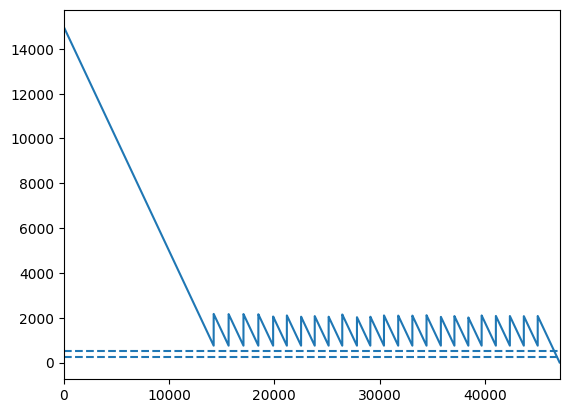

In [5]:
chains.nlive.plot()
plt.xlim(0,len(chains))
plt.hlines(250,0,len(chains),linestyles='dashed')
plt.hlines(500,0,len(chains),linestyles='dashed')

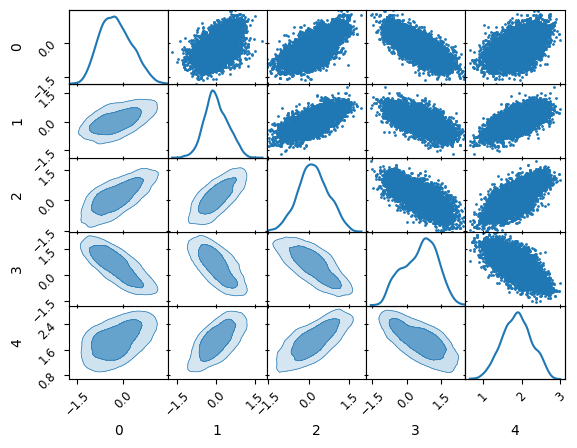

In [6]:
a=ns.MCMCSamples(chains.set_beta(0.01).compress().to_numpy()[...,:5]).plot_2d()
# pc.plot_2d(a)

In [15]:
chains.compress(ncompress="equal")

,0,1,2,3,4,logL,logL_birth,nlive
28827,-0.029526,0.326356,0.684871,0.327518,2.084711,-0.261091,-3.575748,1049.0
28905,0.038685,0.365647,0.590823,0.344962,2.092149,0.059769,-3.575748,971.0
28962,0.169252,0.420117,0.668156,0.020076,2.114301,0.255846,-3.575748,914.0
29101,0.477627,0.855347,1.304290,-0.543734,2.529210,0.755668,-3.575748,775.0
29102,0.041671,0.398425,0.619206,-0.015352,2.174173,0.760491,-3.575748,774.0
...,...,...,...,...,...,...,...,...
45503,0.119701,0.489826,0.774690,0.019807,2.232072,10.858313,10.806209,1591.0
45554,0.087998,0.459188,0.746447,0.062529,2.207766,10.859460,10.847397,1540.0
45825,0.105813,0.480294,0.762681,0.029681,2.232298,10.866496,10.847397,1269.0
46061,0.079931,0.481228,0.753390,0.057148,2.223478,10.872184,10.847397,1033.0


In [24]:
import pickle
import numpy as np
from anesthetic import MCMCSamples
trace = pickle.load(open("trace.pkl", "rb"))
pc = ns.read_chains("../chains/test")

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


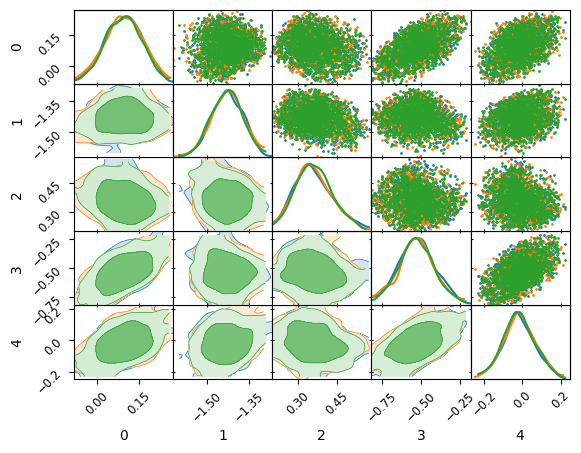

In [25]:

i=list(trace.live.keys())[-1]
diff = np.asarray(trace.diff[i])
live = np.asarray([xi.x for xi in trace.live[i]])
points = np.asarray([xi.x for xi in trace.accepted_live[i]])
prior = np.asarray(trace.prior[i].squeeze())
a = MCMCSamples(diff).plot_2d()
# a=MCMCSamples(prior).plot_2d()
a=MCMCSamples(live).plot_2d(a)
MCMCSamples(points).plot_2d(a)
# pc.plot_2d(a)
# len(diff), len(live), len(points)

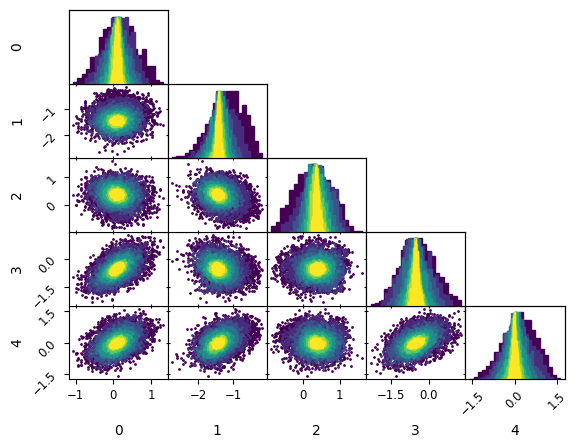

In [26]:
# prior = model.prior.rvs(1000)
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(0, 1, len(trace.live.keys()))]
f,a = ns.make_2d_axes(np.arange(5),upper=False)
# a = MCMCSamples(prior).plot_2d(kinds ={"lower":"kde_2d","diagonal":"hist_1d"},c = colors[0])
for i in trace.live.keys():
    points = np.asarray([xi.x for xi in trace.accepted_live[i]])
    MCMCSamples(points).plot_2d(a,kinds = {"lower":"scatter_2d","diagonal":"hist_1d"},c= colors[i],ec = colors[i])


In [270]:
# a = MCMCSamples((live - live.mean(axis=0)) / live.std(axis=0)).plot_2d()
# MCMCSamples(np.asarray(model.rvs(1000))).plot_2d(a)


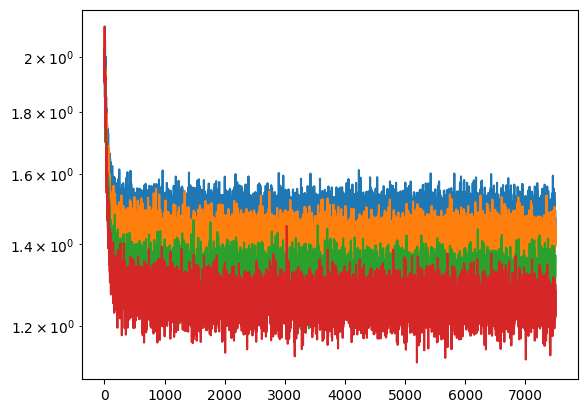

In [ ]:
import matplotlib.pyplot as plt
for k in trace.losses.keys():
    plt.yscale("log")
    plt.plot(trace.losses[k])

In [289]:
live_x = np.asarray([y.x for y in trace.live[trace.iteration[-2]]])
active_x = np.asarray([y.x for y in trace.accepted_live[trace.iteration[-2]]])
# diff_x = np.asarray([y.x for y in trace.diff[trace.iteration[-3]]])

In [290]:
trace.diff

{0: array([[-0.8889971 ,  0.74920356,  0.6005047 ,  0.89162827,  1.0414293 ],
        [-0.11204686,  0.26588884,  0.89678794, -0.6660369 ,  1.1214484 ],
        [-1.1708583 , -0.72608423, -0.25749892,  1.662241  ,  0.79108614],
        ...,
        [-0.4017539 , -1.053039  , -0.6273036 ,  0.4614612 ,  1.559408  ],
        [-0.22589093,  0.01545274, -0.88787514,  0.9280869 ,  0.463427  ],
        [-0.19983432, -0.01919235,  1.2403666 , -0.45222336,  1.2567042 ]],
       dtype=float32),
 1: array([[-0.79453856,  0.42304564, -0.46181116,  1.5807422 ,  1.5298045 ],
        [-0.3832414 ,  1.0963085 ,  0.5093762 ,  1.4262702 ,  2.4093745 ],
        [-0.32842296, -0.15753104, -1.0621432 ,  1.2534509 ,  1.1078516 ],
        ...,
        [-0.7618902 , -0.6695258 ,  0.3255773 ,  0.5360055 ,  1.6465626 ],
        [ 0.7633006 , -0.14731935,  0.43350485,  0.23986009,  1.4665202 ],
        [ 0.26429635, -0.27148375,  0.49171817, -0.02057612,  1.5577705 ]],
       dtype=float32),
 2: array([[-0.01522

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


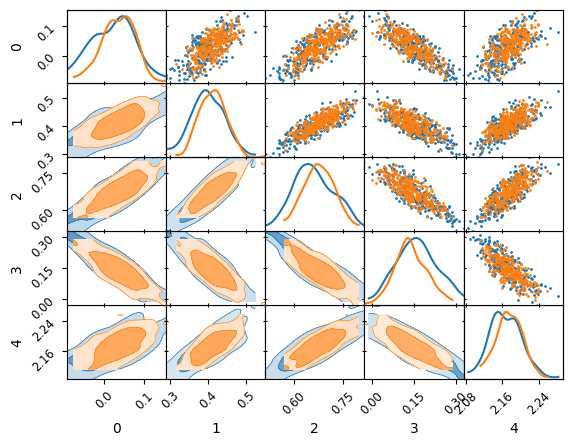

In [288]:
a=MCMCSamples(live_x).plot_2d()
MCMCSamples(active_x).plot_2d(a)

In [11]:
from fusions.cfm import CFM
from fusions.utils import unit_hyperball

In [12]:
diff = CFM(n=5,latent=unit_hyperball(5))
diff.train(live_x,n_epochs=5000,noise = 1e-5)
x = diff.rvs(500)


100%|██████████| 5000/5000 [00:08<00:00, 578.56it/s]


,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


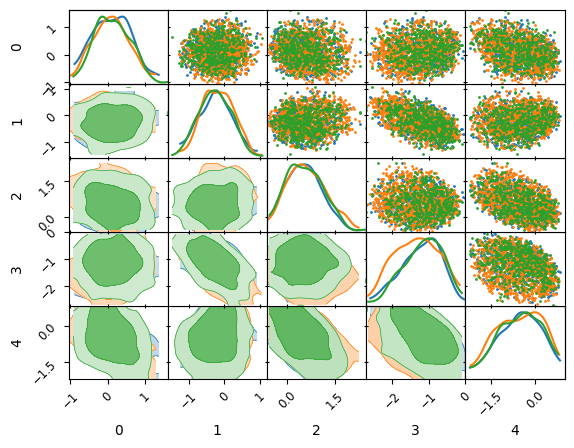

In [13]:
a=MCMCSamples(live_x).plot_2d()
MCMCSamples(active_x).plot_2d(a)
MCMCSamples(x).plot_2d(a)

In [14]:
chains.logX()
from scipy.special import logsumexp
logsumexp((chains.logdX(),chains.logL)) 

19.713694279621055

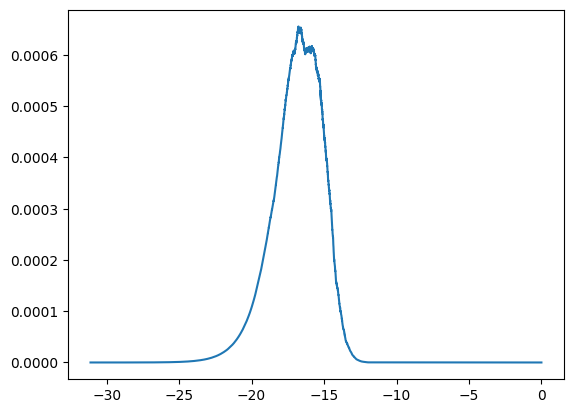

In [15]:
plt.plot(chains.logX(),np.exp(chains.logL + chains.logX()))


<Axes: >

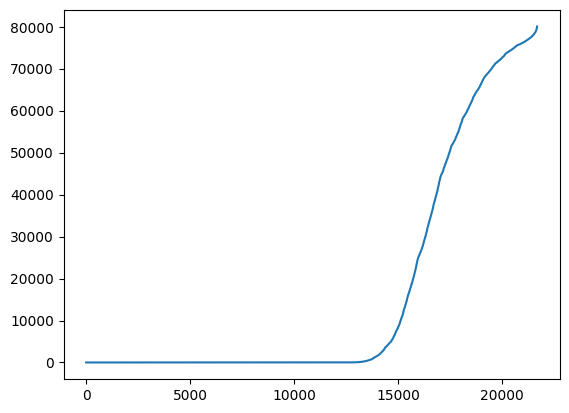

In [16]:
np.exp(chains.logL).plot()
# plt.yscale("log")
